In [19]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

compound = 'Li'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"

# list of the names of all the files in "folder" 
# files with different endings (.DTA, .dat, DSC, ...) all only appear once
files = [i[:-4] for i in os.listdir(folder) if i[-3:] == 'dat']

# extracts the temperature from the filename
# argument is just name of the file
def temperature (name):
    start = name.find('_')
    end = name.find('K')
    
    temp = name[start+1:end]
    if temp.find('p') == -1:
        temp_new = temp
    else:
        middle = temp.find('p')
        temp_new = temp[:middle] + '.' + temp[middle+1:]
    temp_new = str("%.1f" % float(temp_new))
    return temp_new+' K'
    

# extracts the freqeuncy from the .DSC file
# argument needs to be filename of .DSC file (icluding full path and .DSC ending)
def frequency (filename):
    f = open (filename, 'r')
    for line in f:
        if line[0:9] == 'Frequency':
            line = line.strip()
            line = line.split()
            frequency = line[1] + ' ' + line[2]
    return frequency


# none of the following important for any of the following procedure but makes it easier accessing individual files

# this routine sorts the filenames in "files" according to their temperatures
# and gives an array "temperatures" with the ordered temperatures
temperatures = []
for name in files:
    temp_new = temperature(name)[:-2]    
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)

files = files[temperatures.argsort()]
files = switch(files, 34, 35)
temperatures = sorted(temperatures)

In [21]:
if compound == 'Na':
    Tguess, B01g, dB01g, gamma1g, dgamma1g, A1g, dA1g, B02g, dB02g, gamma2g, dgamma2g, A2g, dA2g, B03g, dB03g, gamma3g, dgamma3g, A3g, dA3g, lg, dlg, mg, dmg, ng, dng, freqg  = data_import(folder+'\\python fits\\python_fit_results.txt', 3)
else:
    Tguess, B01g, dB01g, gamma1g, dgamma1g, A1g, dA1g, B02g, dB02g, gamma2g, dgamma2g, A2g, dA2g, lg, dlg, mg, dmg, ng, dng, freqg  = data_import(folder+'\\python fits\\python_fit_results.txt', 3)

Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)



# do you want to fit 3 Lorentzians to the data? 'yes' or 'no'
decision = 'no'
if compound == 'Li' or decision == 'no':
    A3g = []
    for i in files:
        A3g.append(np.nan)
        


freq = []
T = []
mixing_angle = []

B01 = []
A1 = []
gamma1 = []

B02 = []
A2 = []
gamma2 = []

B03 = []
A3 = []
gamma3 = []

l = []
m = []
n = []


#initial_guess = [3482.9, 2.8e8, 2625.6, 3365.9, 513466.8, 482.6, -2.46e-7, 0.00288, -12.39374]
#initial_guess = [3426.5, 2.22e7, 823.8, 3109.2, 3727853.4, 1665.3, -2.55e-8, 3.5e-4, 1.23]
#initial_guess = [B0guess[-1], Aguess[-1], gammaguess[-1], 3121.2, 3727853.4, 2000, -2.55e-8, 3.5e-4, 1.23]

lower_bounds = [0, 0, 0, 0, 0, 0, -np.inf, -np.inf, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]

i = 0 #len(files)-1
for filename in files: #[::-1]:
    freq.append(float(frequency(folder+'\\'+filename+'.DSC')[:-4]))
    T.append(float(temperature(filename)[:-2]))
    
    field, amp = data_import(folder+'\\'+filename+'_processed.txt', 3)
    
    
    # this is for the constrained background
    #B = np.linspace(1000,6000,100000)
    #interpolated = interp1d(field, amp)
    #interpolated_data = interpolated(B)
    
    #maxy = max(interpolated_data)
    #miny = min(interpolated_data)
    #maxx = B[(interpolated_data-maxy)>-1e-10][0]
    #minx = B[(interpolated_data-miny)<1e-10][0]
    
    #px = (maxx + minx)/2
    #py = float(interpolated(px))
    
    
    mask = field < 13000
    #if 21 < i < 37:
    #    mask = field < 8000
    #mask = field < 8000
    
    if np.isnan(A3g[i]):
        #lower_bounds = [0, 0, 0, -5, -np.inf, -np.inf, -np.inf]
        #upper_bounds = [np.inf, np.inf, np.inf, 5, np.inf, np.inf, np.inf]
        
        #if i == 34:
        #    initial_guess = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]]
        #    lower_bounds = [popt[0]-3, 0, 0, -np.inf, -np.inf, -np.inf]
        #    upper_bounds = [popt[0]+3, np.inf, np.inf, np.inf, np.inf, np.inf]
        #
        #elif i<34:
        #    initial_guess = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]]
        #    lower_bounds = [0, 0, 0, -np.inf, -np.inf, -np.inf]
        #    upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        #
        #else:
        #    initial_guess = [B0one[i], Aone[i], gammaone[i], l0[i], m0[i], n0[i]]
        #    lower_bounds = [0, 0, 0, -np.inf, -np.inf, -np.inf]
        #    upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
            
        
        lower_bounds = [0, 0, 0, -np.inf, -np.inf, -np.inf]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        initial_guess = [B0[i], A[i], gamma[i], l0[i], m0[i], n0[i]]
        
        sigma = 1*np.ones(len(field[mask])) #this is default if no error is given
        
        popt, pcov = curve_fit (one_Lor_w_quadr_b, field[mask], amp[mask], initial_guess, bounds = (lower_bounds, upper_bounds), 
                                maxfev=70000, ftol=2.220446049250313e-16 )
        
        h = 6
        k = 7
        
        B03.append([np.nan, np.nan])
        A3.append([np.nan, np.nan])
        gamma3.append([np.nan, np.nan])
        
                
    else:
        lower_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0, -np.inf, -np.inf]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        
        initial_guess = [B0[i], A[i], gamma[i], l0[i], m0[i], n0[i]]
        
        popt, pcov = curve_fit (three_Lor_w_constrained3_quadr_b, field[mask], amp[mask], initial_guess,
                                bounds = (lower_bounds, upper_bounds), maxfev=70000, ftol=2.220446049250313e-16 )
        
        B03.append([popt[6], np.sqrt(pcov[6,6])])
        A3.append([popt[7], np.sqrt(pcov[7,7])])
        gamma3.append([popt[8], np.sqrt(pcov[8,8])])
        
        h = 9
        k = 10
    
    i = i+1 #-1
    
    
    # convert a real_sigma=False error to a real_sigma=True error
    num = len(amp[mask]) - len(initial_guess)
    r = amp[mask] - one_Lor_w_quadr_b(field[mask], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
    chisq = sum((r/sigma) ** 2)
    pcov = pcov * num / chisq
    
    B01.append([popt[0], np.sqrt(pcov[0,0])])
    A1.append([popt[1], np.sqrt(pcov[1,1])])
    gamma1.append([popt[2], np.sqrt(pcov[2,2])])
    
    #mixing_angle.append([popt[3], pcov[3,3]])
    
    #B02.append([popt[3], pcov[3,3]])
    #A2.append([popt[4], pcov[4,4]])
    #gamma2.append([popt[5], pcov[5,5]])
    
    l.append([popt[3], np.sqrt(pcov[3,3])])
    #l.append( [(py-popt[k]-popt[h]*px)/px/px , np.sqrt( (pcov[k,k]/px/px)**2 + (pcov[h,h]/px)**2 ) ] )
    m.append([popt[4], np.sqrt(pcov[4,4])])
    #m.append([ (py - popt[k])/px - popt[h]*px , np.sqrt( (pcov[k,k]/px)**2 + (pcov[h,h]*px)**2 ) ])
    n.append([popt[5], np.sqrt(pcov[5,5])])
    #n.append([py - popt[h]*px**2 - popt[k]*px, np.sqrt( (pcov[h,h]*px**2)**2 + (pcov[k,k]*px)**2 )])
    
        
#    if float(temperature(filename)[:-2]) == 68.6:
#        initial_guess = [3422.1, 1.4e7, 1086.5, 3290.8, 5340873, 1673.8, -1.61e-8, 2.42e-8, -1.0875]
#    elif float(temperature(filename)[:-2]) == 95.6:
#        initial_guess = [3413.5, 1.4e7, 977, 3117.9, 3464853, 1905, -1.8e-8, 2.49e-8, -1.00588]
 
        
T = np.array(T)#[::-1]
freq = np.array(freq)#[::-1]

B01 = np.array(B01)#[::-1]
A1 = np.array(A1)#[::-1]
gamma1 = np.array(gamma1)#[::-1]

B02 = np.array(B02)#[::-1]
A2 = np.array(A2)#[::-1]
gamma2 = np.array(gamma2)#[::-1]

B03 = np.array(B03)#[::-1]
A3 = np.array(A3)#[::-1]
gamma3 = np.array(gamma3)#[::-1]

l = np.array(l)#[::-1]
m = np.array(m)#[::-1]
n = np.array(n)#[::-1]

mixing_angle = np.array(mixing_angle)

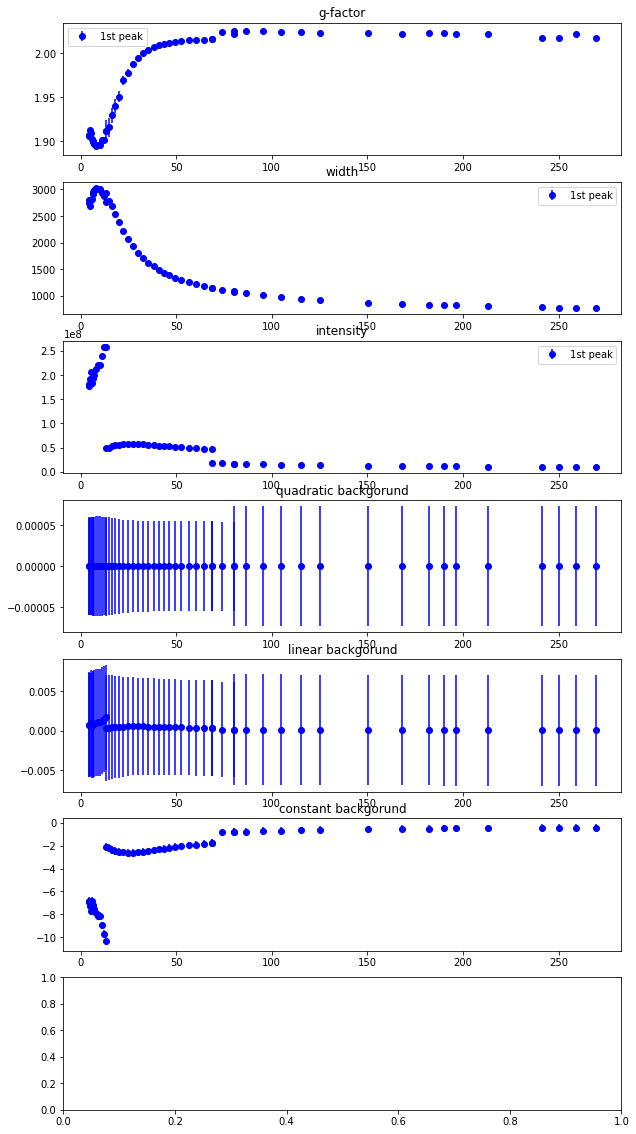

In [24]:
%run functions_for_ESR_data_processing.ipynb

lower_limit = 0
upper_limit = 900
mask = [all( [(lower_limit<T)[i], (T<upper_limit)[i]] ) for i in np.arange(len(T)) ]

fig, axes = plt.subplots(7, 1, sharex=False, sharey=False, figsize=(10,20))

g1, g_err1 = g_factor (freq, B01)
#g2, g_err2 = g_factor (freq, B02)

axes[0].set_title('g-factor')
axes[0].errorbar(T[mask], g1[mask], yerr = g_err1[mask], ecolor='b', fmt='o', mfc = 'b', mec = 'b')
#axes[0].errorbar(T[mask], g2[mask], ecolor='orange', fmt='o', mfc = 'orange', mec = 'orange')
axes[0].legend(['1st peak', '2nd peak', '3rd peak'])
#axes[0].set_ylim(1.5,2.5)


data1 = gamma1
#data2 = gamma2

axes[1].set_title('width')
axes[1].errorbar(T[mask], data1[mask,0], yerr = data1[mask, 1], ecolor='b', fmt='o', mfc = 'b', mec = 'b')
#axes[1].errorbar(T[mask], data2[mask,0], ecolor='orange', fmt='o', mfc = 'orange', mec = 'orange')
axes[1].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])
#axes[2].set_ylim(0,9000)


A1r, dA1r = rescale_A_Na(A1[:,0], A1[:,1])
#A2r, dA2r = rescale_A_Li(A2[:,0], A2[:,1])

axes[2].set_title('intensity')
axes[2].errorbar(T[mask], A1r[mask], yerr = dA1r[mask], ecolor='b', fmt='o', mfc = 'b', mec = 'b')
#axes[2].errorbar(T[mask], A2r[mask], ecolor='orange', fmt='o', mfc = 'orange', mec = 'orange')
axes[2].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])
#axes[2].set_ylim(0,0.4e8)

axes[3].set_title('quadratic backgorund')
axes[3].errorbar(T[mask], l[mask,0], yerr=np.sqrt(l[mask, 1]), ecolor='b', fmt='o', mfc = 'b', mec = 'b')

axes[4].set_title('linear backgorund')
axes[4].errorbar(T[mask], m[mask,0], yerr=np.sqrt(m[mask,1]), ecolor='b', fmt='o', mfc = 'b', mec = 'b')

axes[5].set_title('constant backgorund')
axes[5].errorbar(T[mask], n[mask,0], yerr=np.sqrt(n[mask,1]), ecolor='b', fmt='o', mfc = 'b', mec = 'b')


#axes[6].set_title('phase mixing angle')
#axes[6].errorbar(T[mask], mixing_angle[mask,0], yerr=mixing_angle[mask,1], ecolor='b', fmt='o', mfc = 'b', mec = 'b')




data = [T, B01[:,0], B01[:,1], gamma1[:,0], gamma1[:,1], A1[:,0], A1[:,1],
        #B02[:,0], B02[:,1], gamma2[:,0], gamma2[:,1], A2[:,0], A2[:,1], 
        #B03[:,0], B03[:,1], gamma3[:,0], gamma3[:,1], A3[:,0], A3[:,1],
       l[:,0], l[:,1], m[:,0], m[:,1], n[:,0], n[:,1], freq]#, mixing_angle[:,0], mixing_angle[:,1]]        
names = ['T', 'B01', 'delta B01', 'gamma1', 'delta gamma1', 'intensity1', 'delta intensity1',
        #'B02', 'delta B02', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        # 'B03', 'delta B03', 'gamma3', 'delta gamma3', 'intensity3', 'delta intensity3',
         'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency']#, 'mixing angle', 'delta angle']
units = ['K', 'G', 'G', 'G', 'G', 'a.u.', 'a.u.', 
         #'G', 'G', 'G', 'G', 'a.u.', 'a.u.',
         #'G', 'G', 'G', 'G', 'a.u.', 'a.u.',
         '', '', '', '', '', '', 'GHz']#, 'degree', 'degree']
comments = ['', '', '', '', '', '','', 
            #'', '', '', '', '', '',
            #'', '', '', '', '', '',
            '', '', '', '', '', '', '']#, '', '']
filename = folder+'\\python fits\\initialguess.txt'

save(data, names, units, comments, filename)